In [1]:
from utils.plain_vec import load
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
features, labels = load()

### Support vector machine

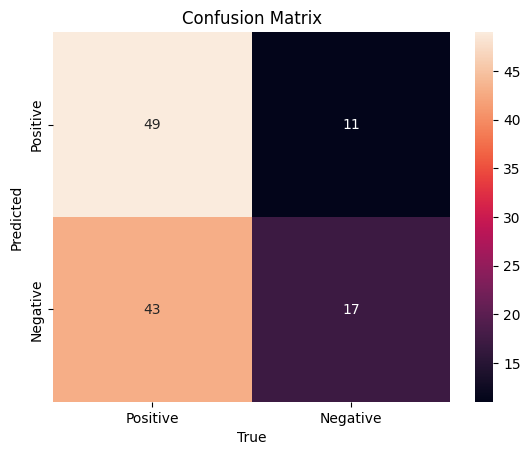

In [3]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
svm = SVC(kernel='rbf', C=1, random_state=42, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
class_labels = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


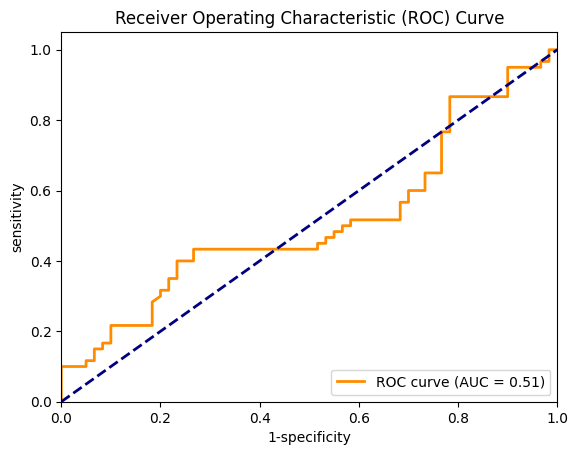

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain prediction probabilities (this returns probabilities for each class)
predictions_prob = svm.predict_proba(X_test)

# For binary classification, get probabilities of the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()